<a href="https://colab.research.google.com/github/KeerHu73/EDA/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

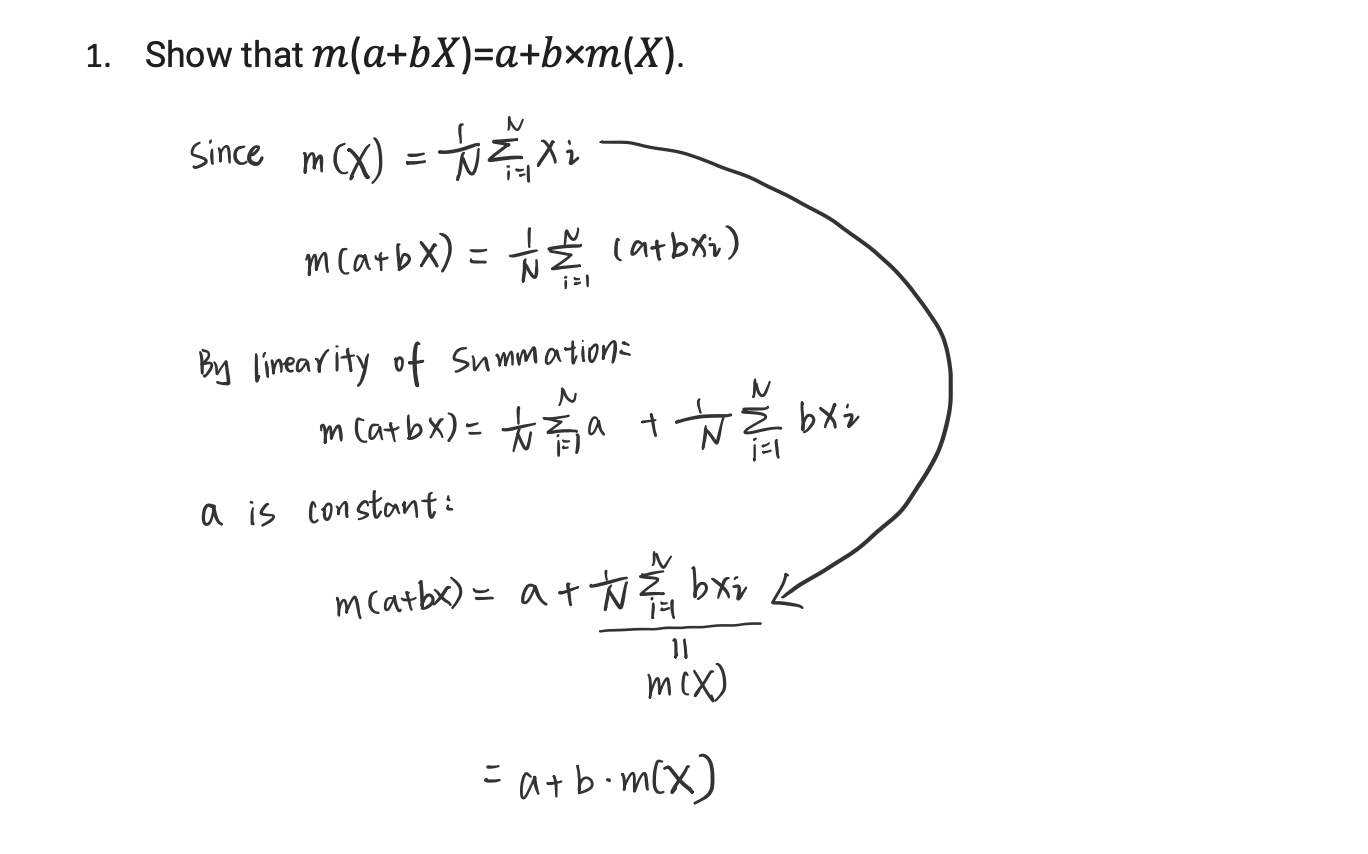

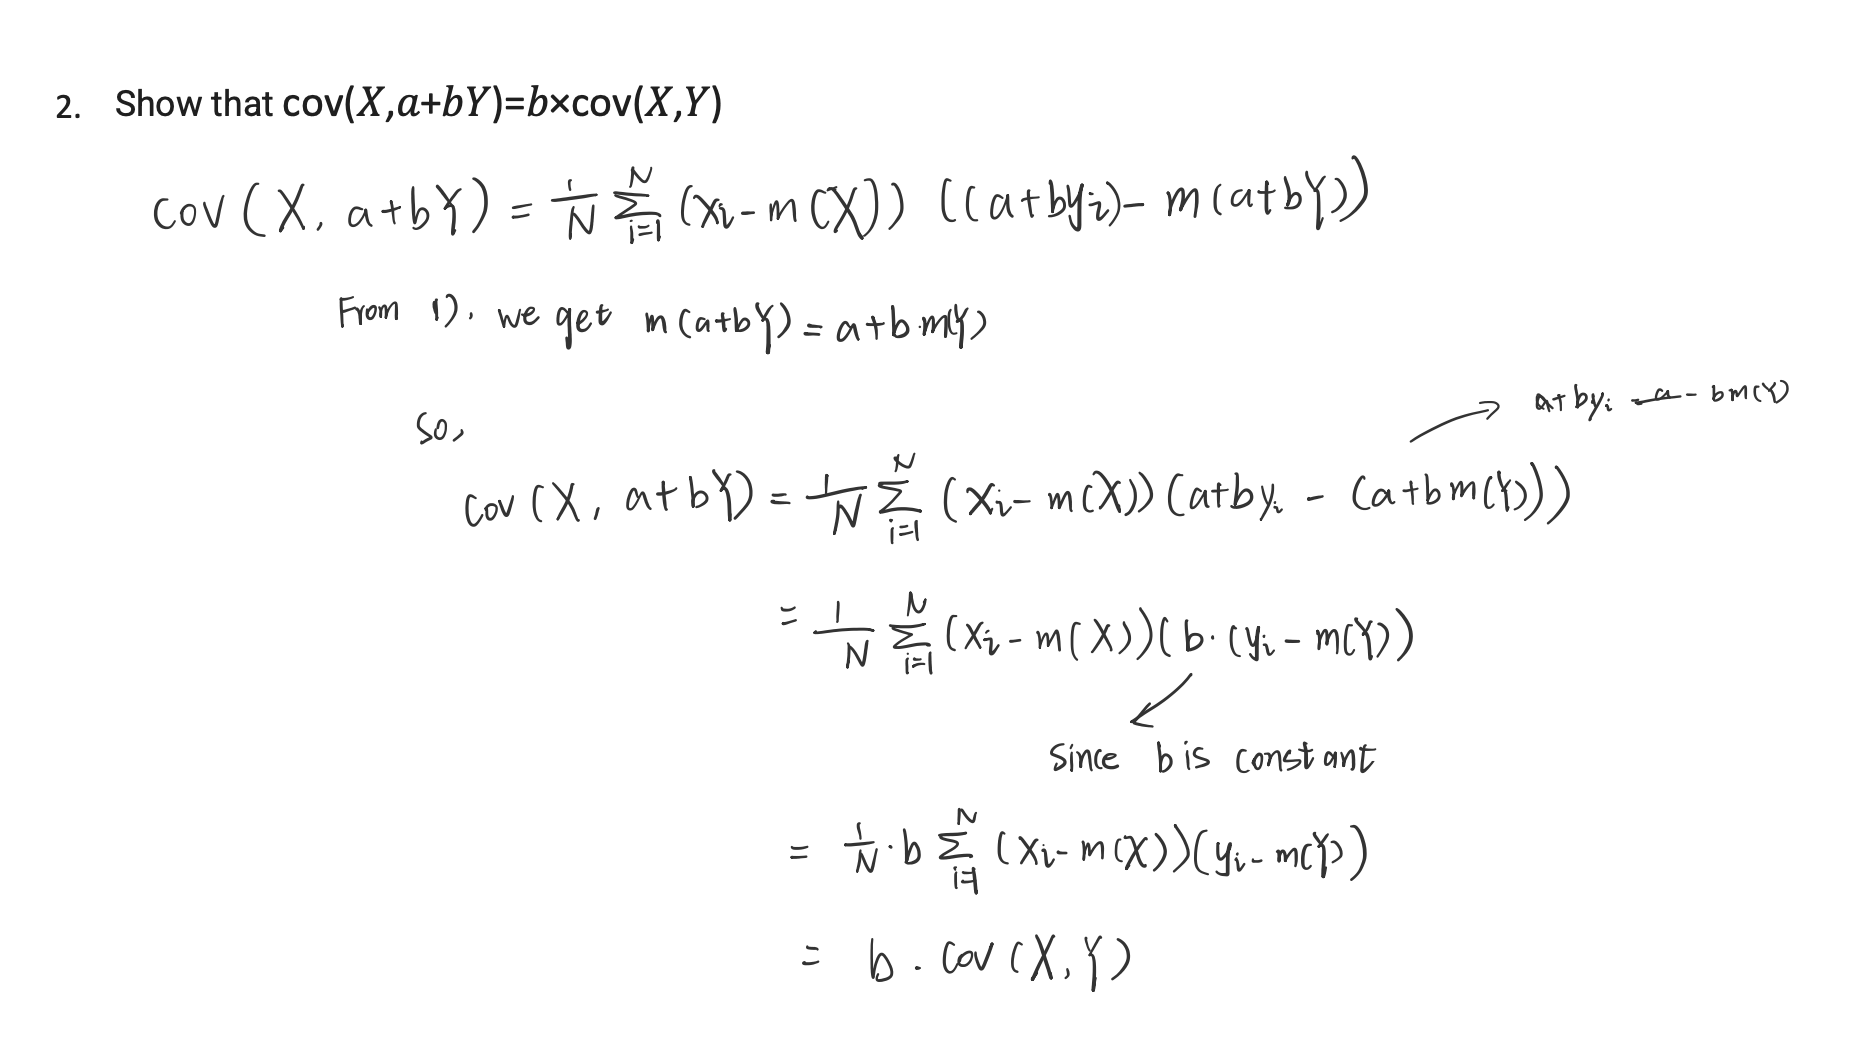


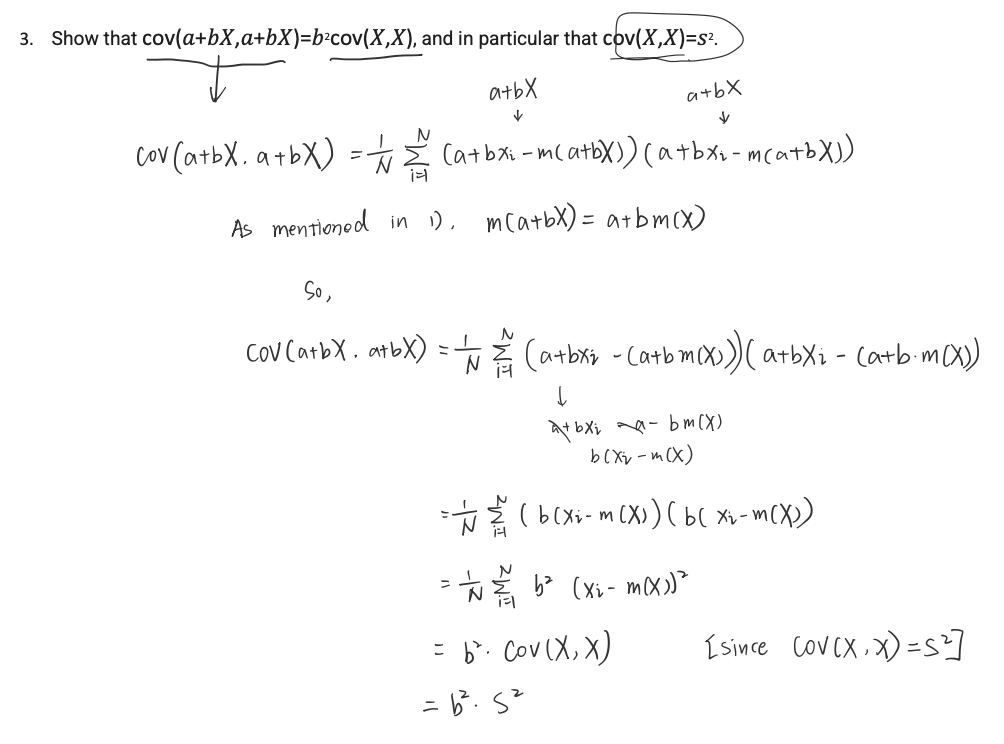


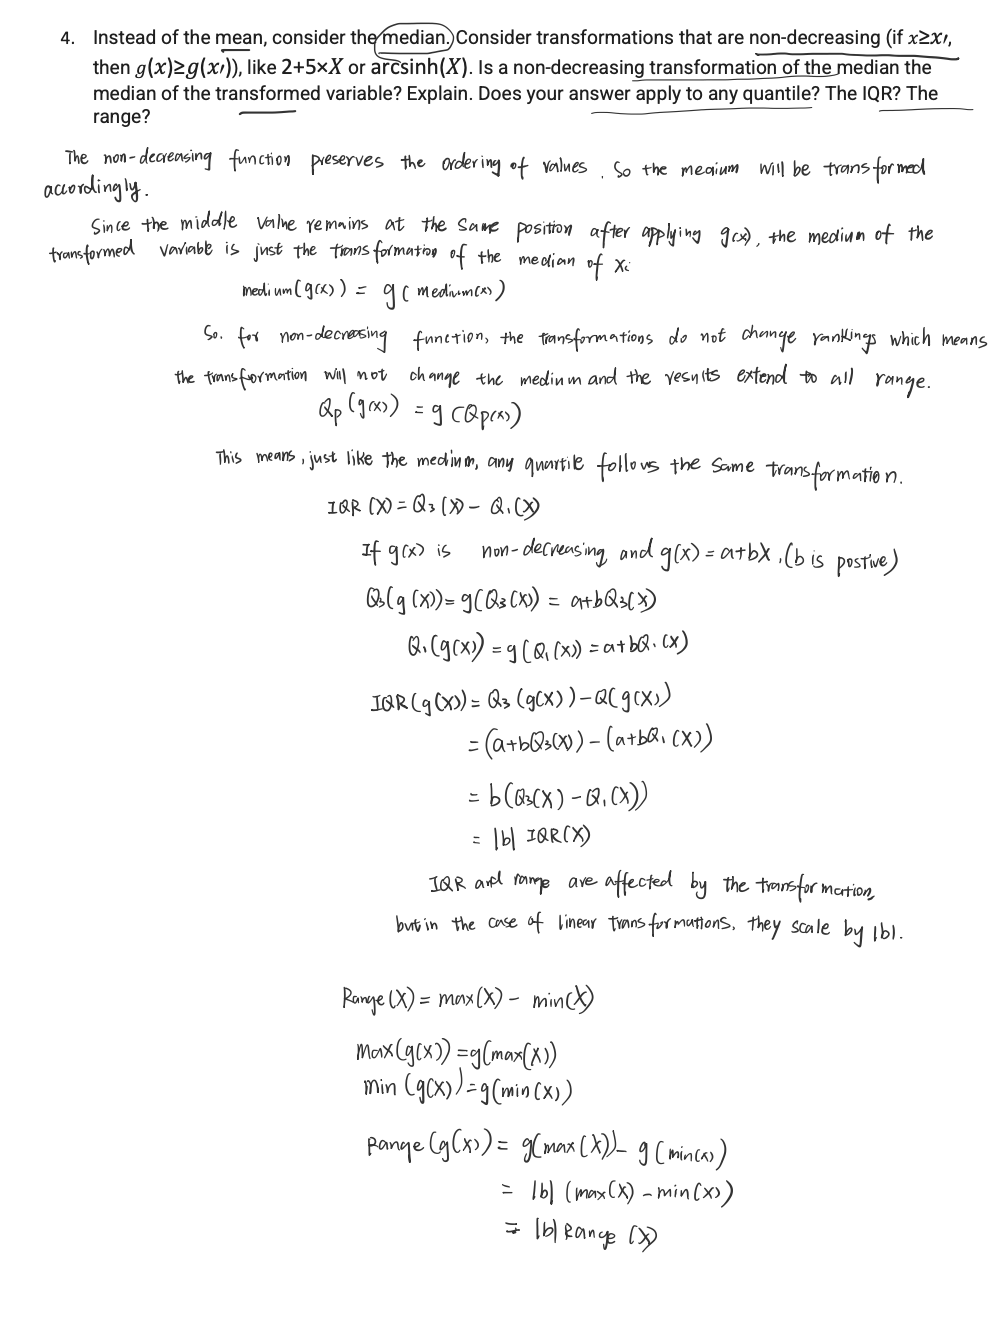

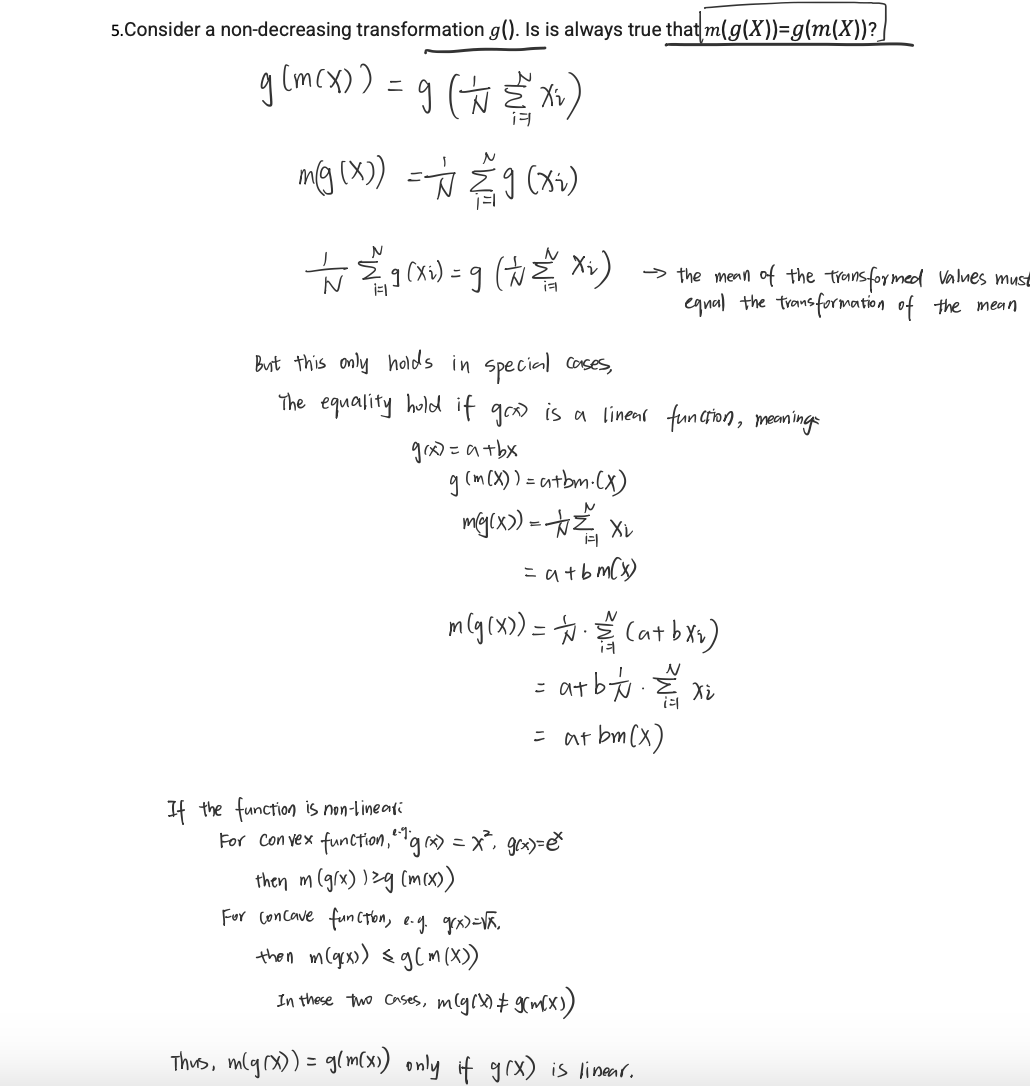

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url= "https://raw.githubusercontent.com/KeerHu73/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv"
df = pd.read_csv(url,low_memory=False)

df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


2.For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.

[ 250000  463657 3649107 ... 1064580  737375 1024469] 

Foreign Gift Amount
100        581
250000     439
500000     427
50         324
1000       322
          ... 
213603       1
183909       1
546190       1
31544        1
1024469      1
Name: count, Length: 16271, dtype: int64 



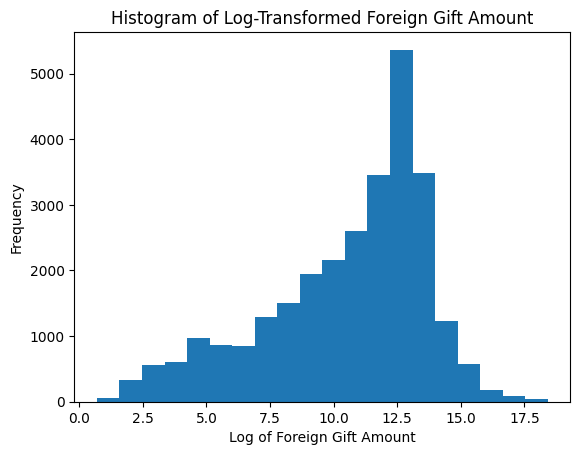

In [11]:
print(df['Foreign Gift Amount'].unique(), '\n')
print(df['Foreign Gift Amount'].value_counts(), '\n')

df['Foreign Gift Amount_log'] = np.log(df['Foreign Gift Amount']) #log() could drop zeros and negative numbers from visualizations or analysis
df = df[df['Foreign Gift Amount_log'] > 0]

df['Foreign Gift Amount_log'].hist(bins=20, grid=False) #OK-looking histogram
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Foreign Gift Amount")

plt.show()

From this histogram above, I found that the highest concentration of log-transformed values appears around log(12-13), which corresponds to a Foreign Gift Amount of approximately e^12 to e^13(by calculation is about $160k - 440k). This suggests that most donations are in the hundreds of thousands range.

3. For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

Value Counts:
Gift Type
Contract         17246
Monetary Gift    10902
Real Estate         11
Name: count, dtype: int64

Proportions:
Gift Type
Contract         0.612451
Monetary Gift    0.387159
Real Estate      0.000391
Name: count, dtype: float64


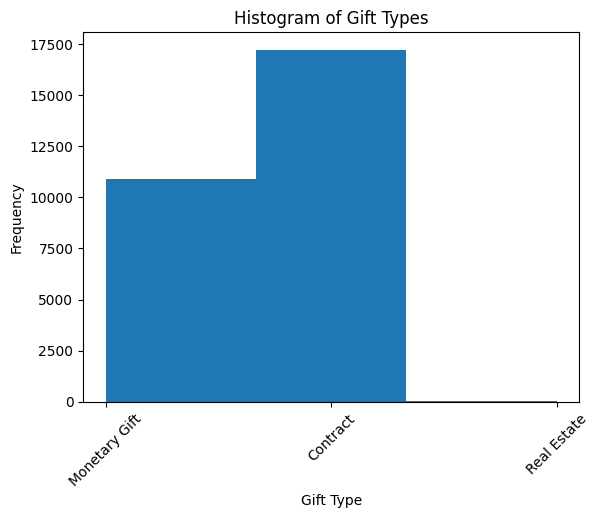

In [17]:
gift_counts = df['Gift Type'].value_counts()

# Calculate proportions
gift_proportions = gift_counts / gift_counts.sum()

print("Value Counts:")
print(gift_counts)

print("\nProportions:")
print(gift_proportions)

df['Gift Type'].hist(bins=len(gift_counts), grid=False)  # Ensure the number of bins matches the unique gift types
plt.xlabel("Gift Type")
plt.ylabel("Frequency")
plt.title("Histogram of Gift Types")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


4. Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

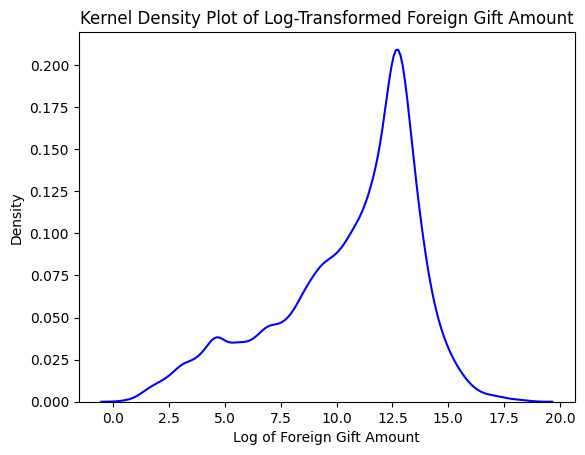

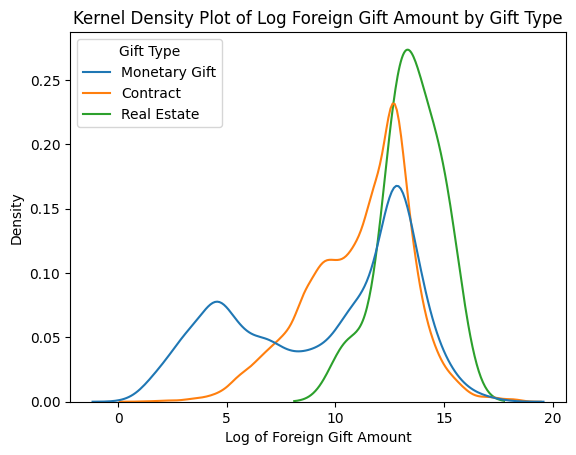

In [28]:
import seaborn as sns

# Ensure no zero or negative values before applying log
df['Foreign Gift Amount_log'] = np.log(df['Foreign Gift Amount'])
df = df[df['Foreign Gift Amount_log'] > 0]  # Remove invalid values

# First KDE Plot: Overall Log-Transformed Foreign Gift Amount
sns.kdeplot(df['Foreign Gift Amount_log'], color="blue")
plt.title("Kernel Density Plot of Log-Transformed Foreign Gift Amount")
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.show()

# Second KDE Plot: Log Foreign Gift Amount by Gift Type（Grouped Kernel Density Plots）
sns.kdeplot(data=df, x="Foreign Gift Amount_log", hue="Gift Type",common_norm=False)
plt.title("Kernel Density Plot of Log Foreign Gift Amount by Gift Type")
plt.xlabel("Log of Foreign Gift Amount")
plt.ylabel("Density")
plt.show()


The first KDE plot shows that the log-transformed foreign gift amounts are right-skewed, with a peak around log(12-13), meaning most gifts fall in the range of approximately $160K - 440K. There is a long right tail, indicating the presence of a few very large gifts.

In the second KDE plot, which is conditioned on gift type, monetary gifts and contracts have similar distributions, but monetary gifts appear more spread out across different values. Real estate gifts tend to be larger, with a peak slightly higher than the other two categories. While all gift types follow a similar pattern, their distributions vary in concentration and spread, suggesting that real estate gifts are generally of higher value, while monetary gifts and contracts have more variation.

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

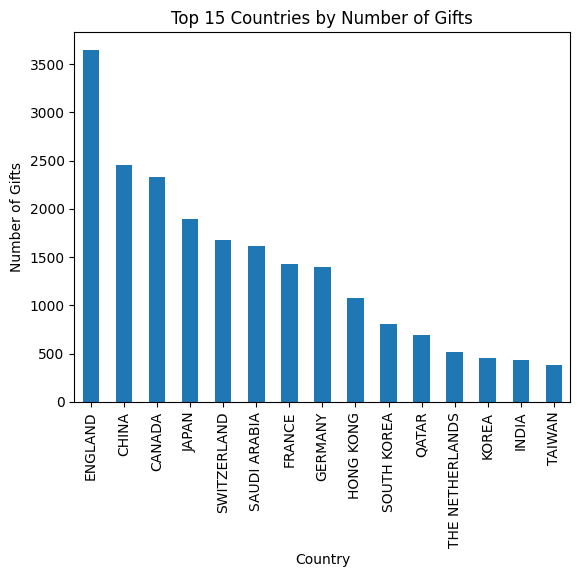

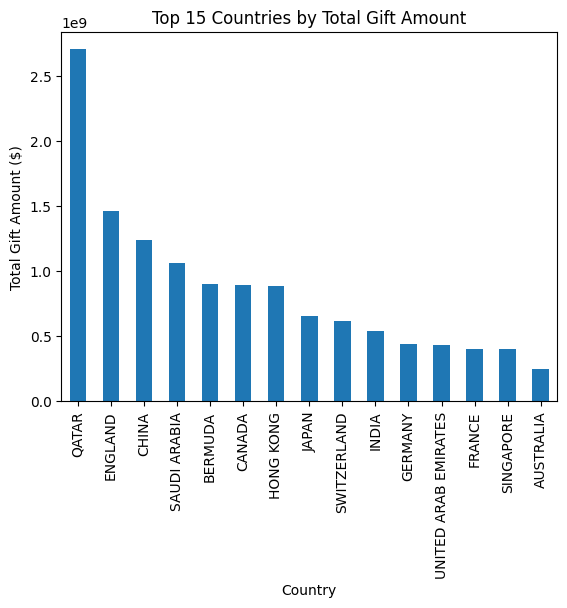

In [30]:
# Group by country and count the number of gifts
top_countries_count = df.groupby(['Country of Giftor'])['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)

# Group by country and sum the total gift amount
top_countries_amount = df.groupby(['Country of Giftor'])['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

# Plot the number of gifts per country
top_countries_count.plot(kind='bar', title='Top 15 Countries by Number of Gifts', ylabel='Number of Gifts', xlabel='Country')
plt.show()

# Plot the total amount given per country
top_countries_amount.plot(kind='bar', title='Top 15 Countries by Total Gift Amount', ylabel='Total Gift Amount ($)', xlabel='Country')
plt.show()

# I used the bar chart instead of histogram, I think it is more visible to show the top 15 countries.


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


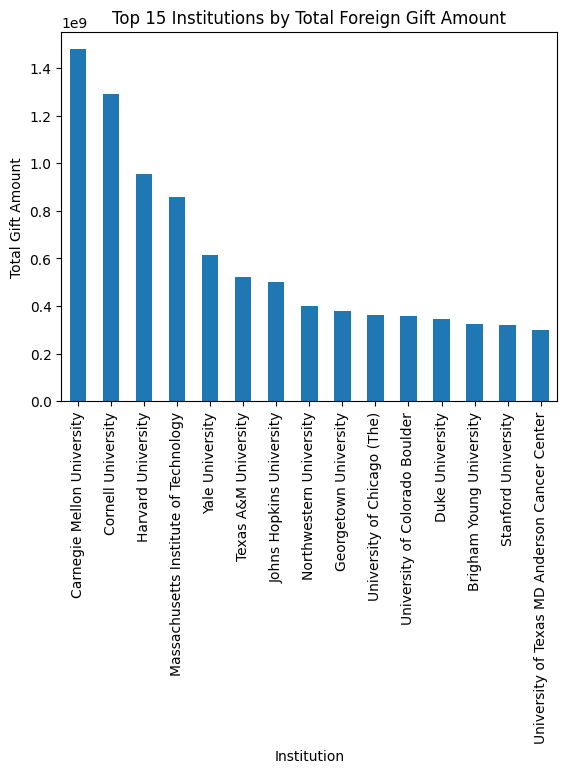

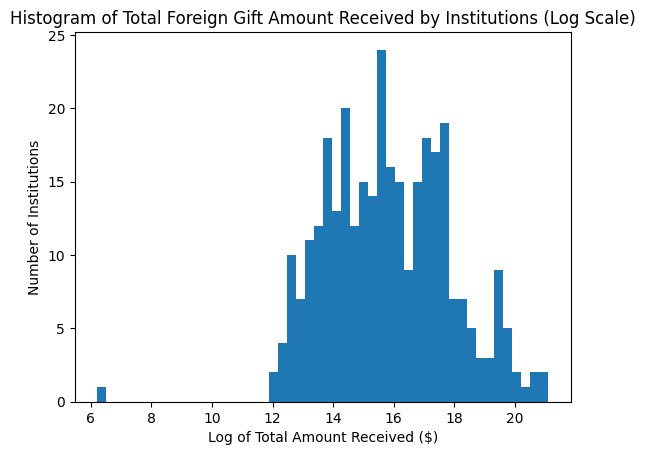

In [34]:
# Group by institution and sum the total gift amount
top_institutions = df.groupby(['Institution Name'])['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)

# Plot the top 15 institutions by total gift amount
top_institutions.plot(kind='bar', title='Top 15 Institutions by Total Foreign Gift Amount', ylabel='Total Gift Amount', xlabel='Institution')
plt.show()

# Create a histogram of total amount received by all institutions

# Group by institution name and sum the total gift amount
institution_totals = df.groupby(['Institution Name'])['Foreign Gift Amount'].sum()

# Apply log transformation and remove non-positive values(good looking to show all institutions)
institution_totals_log = np.log(institution_totals)
institution_totals_log = institution_totals_log[institution_totals_log > 0]

# Plot histogram with increased bins for better visibility
plt.hist(institution_totals_log, bins=50)
plt.xlabel("Log of Total Amount Received ($)")
plt.ylabel("Number of Institutions")
plt.title("Histogram of Total Foreign Gift Amount Received by Institutions (Log Scale)")
plt.show()


7.Which giftors provide the most money, in total?

In [42]:
top_giftors = df.groupby(['Giftor Name'])['Foreign Gift Amount'].sum().sort_values(ascending=False).head(1)
print(top_giftors) #easy to see the names

#It is Qatar Foundation

Giftor Name
Qatar Foundation    1166503744
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

1.Load ./data/drilling_rigs.csv and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url= 'https://raw.githubusercontent.com/KeerHu73/EDA/refs/heads/main/assignment/data/drilling_rigs.csv'
df = pd.read_csv(url)
df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [30]:
df.info()
#623 observations (rows)
#10 variables (columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

The dataset contains mixed data types with both numeric and object-type columns.
While columns such as "Active Well Service Rig Count (Number of Rigs)" and "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)" are correctly stored as integers (int64), critical columns like "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)", "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)", and "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)" are currently stored as object types (dtype=object).

These key metric columns require conversion to numeric data types to enable quantitative analysis.

In [31]:
df.describe()

,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)"
count,623.000000,623.000000,623.000000
mean,1246.051364,98.939005,1344.980738
std,700.532921,65.054289,744.188206
min,237.000000,6.000000,250.000000
25%,725.500000,48.500000,795.500000
50%,995.000000,95.000000,1068.000000
75%,1707.500000,125.000000,1783.500000
max,4238.000000,283.000000,4521.000000


In [32]:
#clean data
numeric_cols = [
    "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
    "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
    "Active Well Service Rig Count (Number of Rigs)"
]

df[numeric_cols] = df[numeric_cols].replace("Not Available", np.nan)  # Replace "Not Available" with NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
print(df.head())
print(df.info())

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

The dataset contains 623 observations and 10 variables. Some numeric columns were incorrectly stored as objects due to "Not Available" values. These values were replaced with NaN, and the columns were converted to numeric types. Missing values were left as NaN for further handling if necessary. The "Month" column was left unchanged because of the further handling in Q2.


2. To convert the Month variable to an ordered datetime variable, use df['time'] = pd.to_datetime(df['Month'], format='mixed').

In [33]:
df['time'] = pd.to_datetime(df['Month'], format='mixed')

3. Let's look at Active Well Service Rig Count (Number of Rigs), which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

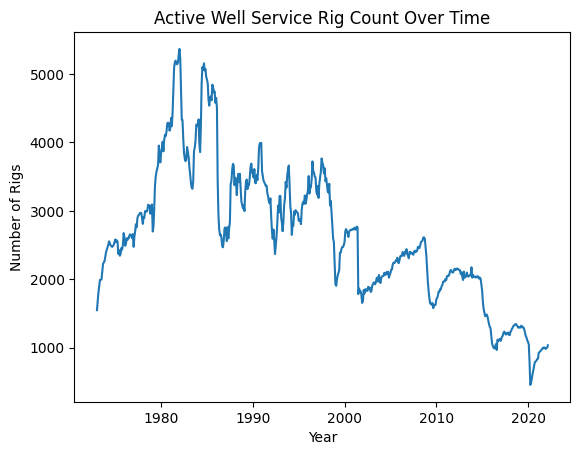

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.lineplot(data = df, x = 'time', y = 'Active Well Service Rig Count (Number of Rigs)')
fig.set(title="Active Well Service Rig Count Over Time",
xlabel='Year', ylabel='Number of Rigs')
plt.show()

I found that the number of active rigs increased steadily from the 1970s to the early 1980s, reaching a peak above 5000. After that, there were sharp drops and recoveries, showing a lot of fluctuations. Around 2000, the rig count decreased significantly, followed by some recovery but never reaching the previous highs. Since 2015, the trend has been mostly downward, with a major drop around 2020, likely due to external economic or industry-related factors.

4. Instead of levels, we want to look at change over time. Compute the first difference of Active Well Service Rig Count (Number of Rigs) and plot it over time. Describe what you see.

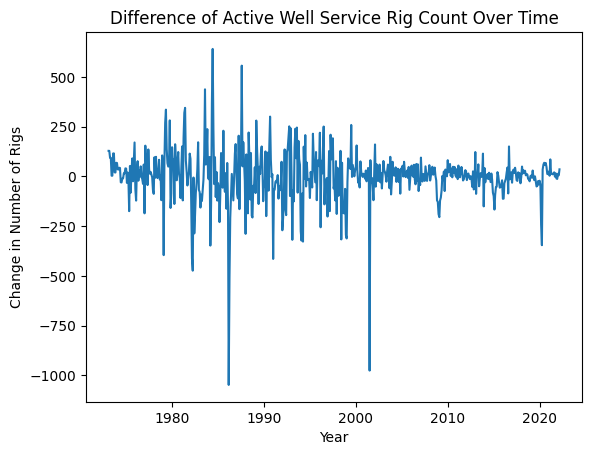

In [37]:
#compute difference
df['rig_count_change'] = df['Active Well Service Rig Count (Number of Rigs)'] - df['Active Well Service Rig Count (Number of Rigs)'].shift(1)

fig = sns.lineplot(data = df, x = 'time', y = 'rig_count_change')
fig.set(title="Difference of Active Well Service Rig Count Over Time",
xlabel='Year', ylabel='Change in Number of Rigs')
plt.show()

The graph shows that the change in rig count is highly volatile, with frequent ups and downs. There are some extreme spikes, especially in the late 1970s, early 1980s, and around 2000, where the number of rigs dropped sharply. More recent years show smaller fluctuations but still occasional large drops, such as around 2020. This suggests that the rig count experiences both gradual changes and sudden shocks, likely due to economic or industry-related events.

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [42]:
melted_df = df.melt(id_vars=['time'],  # Keep time as the index
                     value_vars=[ # These two columns are what I want to melt
                         'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                         'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
                     ],
                     var_name='Rig Type', # Convert column names into categorical variable
                     value_name='Number of Rigs')  # Store values in a single column

df.head()


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time,rig_count_change
0,1973 January,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549.0,1973-01-01,NaN
1,1973 February,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677.0,1973-02-01,128.0
2,1973 March,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805.0,1973-03-01,128.0
3,1973 April,914,79,NaN,NaN,NaN,NaN,NaN,993,1898.0,1973-04-01,93.0
4,1973 May,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991.0,1973-05-01,93.0


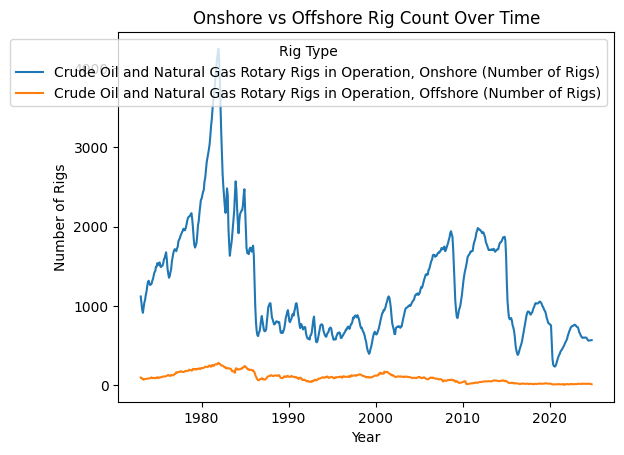

In [43]:
fig = sns.lineplot(data=melted_df, x="time", y="Number of Rigs", hue="Rig Type")
fig.set(title="Onshore vs Offshore Rig Count Over Time",
xlabel='Year', ylabel='Number of Rigs')
plt.show()